In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
dirty_data_path = '/kaggle/input/transactional-retail-dataset-of-electronics-store/dirty_data.csv'
dirty_data = pd.read_csv(dirty_data_path)

In [3]:
dirty_data.head()  

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


# **DATA CLEANING**

In [4]:
dirty_data.describe() 

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


In [5]:
dirty_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       500 non-null    object 
 1   customer_id                    500 non-null    object 
 2   date                           500 non-null    object 
 3   nearest_warehouse              500 non-null    object 
 4   shopping_cart                  500 non-null    object 
 5   order_price                    500 non-null    int64  
 6   delivery_charges               500 non-null    float64
 7   customer_lat                   500 non-null    float64
 8   customer_long                  500 non-null    float64
 9   coupon_discount                500 non-null    int64  
 10  order_total                    500 non-null    float64
 11  season                         500 non-null    object 
 12  is_expedited_delivery          500 non-null    boo

In [6]:
print(f'Shape of dirty_data is: {dirty_data.shape}')

Shape of dirty_data is: (500, 16)


In [7]:
print(dirty_data.isnull().sum())

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           0
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           0
is_happy_customer                0
dtype: int64


In [8]:
print(dirty_data.dtypes)

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


In [9]:
dirty_data = dirty_data.drop_duplicates()
print(dirty_data.dtypes) 

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object


In [10]:
dirty_data['nearest_warehouse'] = dirty_data['nearest_warehouse'].str.title()
dirty_data['date'] = pd.to_datetime(dirty_data['date'])
if dirty_data.order_id.is_unique:    
    print("Data in order_id is unique")      # execute when 'if' block will true
else:
    print("Data in order_id is not unique")
dirty_data['nearest_warehouse'].unique()

Data in order_id is unique


array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

In [11]:
dirty_data.nearest_warehouse = dirty_data.nearest_warehouse.str.title()
dirty_data['nearest_warehouse'].unique()
warehouses = dirty_data['nearest_warehouse'].value_counts()
print(warehouses)

Thompson     197
Nickolson    184
Bakers       119
Name: nearest_warehouse, dtype: int64


In [13]:
dirty_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


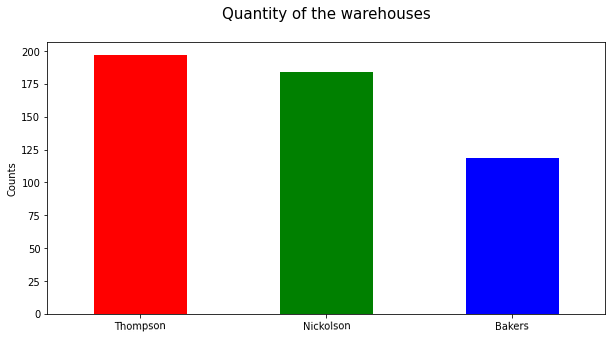

In [14]:
Q1 = dirty_data['order_total'].quantile(0.25)
Q3 = dirty_data['order_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
cleaned_data = dirty_data[(dirty_data['order_total'] >= lower_bound) & (dirty_data['order_total'] <= upper_bound)]
warehouses.plot(kind='bar', rot=1, color=['r','g','b'], figsize=(10,5))
plt.title("Quantity of the warehouses\n", size=15)
plt.ylabel("Counts");


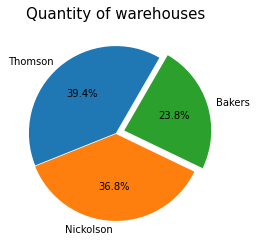

In [15]:
plt.pie(warehouses,
        labels=['Thomson',"Nickolson",'Bakers'],
        autopct="%0.1f%%",
        explode=[0,.01,0.1],
        startangle=60,radius=1)
plt.title("Quantity of warehouses", size=15)
plt.show()

In [16]:
cleaned_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 482 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       482 non-null    object        
 1   customer_id                    482 non-null    object        
 2   date                           482 non-null    datetime64[ns]
 3   nearest_warehouse              482 non-null    object        
 4   shopping_cart                  482 non-null    object        
 5   order_price                    482 non-null    int64         
 6   delivery_charges               482 non-null    float64       
 7   customer_lat                   482 non-null    float64       
 8   customer_long                  482 non-null    float64       
 9   coupon_discount                482 non-null    int64         
 10  order_total                    482 non-null    float64       
 11  season             

# **NORMALIZATION**

In [42]:
cleaned_data.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


**1.  MIN MAX**

In [40]:
# Create a copy of the DataFrame
data = cleaned_data.copy()

# Min-Max Normalization on the copy
min_val = data['order_total'].min()
max_val = data['order_total'].max()
data['order_total_minmax'] = (data['order_total'] - min_val) / (max_val - min_val)
print(data.head())


    order_id   customer_id       date nearest_warehouse  \
0  ORD182494  ID6197211592 2019-06-22          Thompson   
1  ORD395518  ID0282825849 2019-12-29          Thompson   
2  ORD494479  ID0579391891 2019-03-02         Nickolson   
3  ORD019224  ID4544561904 2019-01-12         Nickolson   
4  ORD104032  ID6231506320 2019-11-28         Nickolson   

                                       shopping_cart  order_price  \
0  [('Lucent 330S', 1), ('Thunder line', 2), ('iS...        12200   
1        [('Thunder line', 1), ('Universe Note', 2)]         9080   
2               [('Thunder line', 1), ('pearTV', 2)]        10670   
3  [('Universe Note', 1), ('Alcon 10', 2), ('Oliv...        24800   
4  [('Universe Note', 1), ('Olivia x460', 1), ('i...         9145   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             79.89    -37.815105     144.932843               10   
1             62.71    -37.802736     144.951118                0   
2             65.87    

**2.  DECIMAL SCALING**

In [43]:
max_abs_val = data['order_total'].abs().max()
d = len(str(int(max_abs_val)))  # number of digits before decimal
data['order_total_decimal'] = cleaned_data['order_total'] / 10**d
print(data.head())


    order_id   customer_id       date nearest_warehouse  \
0  ORD182494  ID6197211592 2019-06-22          Thompson   
1  ORD395518  ID0282825849 2019-12-29          Thompson   
2  ORD494479  ID0579391891 2019-03-02         Nickolson   
3  ORD019224  ID4544561904 2019-01-12         Nickolson   
4  ORD104032  ID6231506320 2019-11-28         Nickolson   

                                       shopping_cart  order_price  \
0  [('Lucent 330S', 1), ('Thunder line', 2), ('iS...        12200   
1        [('Thunder line', 1), ('Universe Note', 2)]         9080   
2               [('Thunder line', 1), ('pearTV', 2)]        10670   
3  [('Universe Note', 1), ('Alcon 10', 2), ('Oliv...        24800   
4  [('Universe Note', 1), ('Olivia x460', 1), ('i...         9145   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             79.89    -37.815105     144.932843               10   
1             62.71    -37.802736     144.951118                0   
2             65.87    

**3.  ZSCORE**

In [41]:
mean_val = data['order_total'].mean()
std_dev = data['order_total'].std()
data['order_total_zscore'] = (data['order_total'] - mean_val) / std_dev
print(data.head())

    order_id   customer_id       date nearest_warehouse  \
0  ORD182494  ID6197211592 2019-06-22          Thompson   
1  ORD395518  ID0282825849 2019-12-29          Thompson   
2  ORD494479  ID0579391891 2019-03-02         Nickolson   
3  ORD019224  ID4544561904 2019-01-12         Nickolson   
4  ORD104032  ID6231506320 2019-11-28         Nickolson   

                                       shopping_cart  order_price  \
0  [('Lucent 330S', 1), ('Thunder line', 2), ('iS...        12200   
1        [('Thunder line', 1), ('Universe Note', 2)]         9080   
2               [('Thunder line', 1), ('pearTV', 2)]        10670   
3  [('Universe Note', 1), ('Alcon 10', 2), ('Oliv...        24800   
4  [('Universe Note', 1), ('Olivia x460', 1), ('i...         9145   

   delivery_charges  customer_lat  customer_long  coupon_discount  \
0             79.89    -37.815105     144.932843               10   
1             62.71    -37.802736     144.951118                0   
2             65.87    

# **FREQUENT ITEM SETS RETRIEVAL**

In [20]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import fpgrowth
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('/kaggle/input/transactional-retail-dataset-of-electronics-store/dirty_data.csv')

# Example preprocessing: assuming your dataset has a column 'shopping_cart'
# and each row contains a list of items separated by commas
df['shopping_cart'] = df['shopping_cart'].apply(lambda x: x.split(','))

# Perform one-hot encoding to convert items into binary indicators
encoded_df = df['shopping_cart'].str.join('|').str.get_dummies()

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True)



**FREQUENT ITEM SETS USING CANDIDATE GENERATION**

In [21]:
# Generate frequent itemsets using Apriori algorithm with candidate generation
frequent_itemsets = apriori(encoded_df, min_support=0.1, use_colnames=True, max_len=3)

# Display frequent itemsets
print("Frequent Item Sets:")
print(frequent_itemsets)


Frequent Item Sets:
    support                 itemsets
0     0.188           ( ('Alcon 10')
1     0.206     ( ('Candle Inferno')
2     0.214        ( ('Lucent 330S')
3     0.198        ( ('Olivia x460')
4     0.210       ( ('Thunder line')
..      ...                      ...
60    0.100  ( ('iStream',  1),  2))
61    0.106   ( 1),  ('pearTV',  2))
62    0.100  ( 2)],  1),  ('pearTV')
63    0.198         ( 1),  1)],  2))
64    0.234         ( 2)],  1),  2))

[65 rows x 2 columns]


**FREQUENT ITEM SETS WITHOUT USING CANDIDATE GENERATION**

In [22]:
# Generate frequent itemsets using FP-Growth algorithm
frequent_itemsets = fpgrowth(encoded_df, min_support=0.1, use_colnames=True)

# Display frequent itemsets
print("Frequent Item Sets:")
print(frequent_itemsets)

Frequent Item Sets:
    support                      itemsets
0     0.758                         ( 1))
1     0.674                         ( 2))
2     0.446                        ( 1)])
3     0.210            ( ('Thunder line')
4     0.190                 ( ('iStream')
..      ...                           ...
60    0.176        ( 1),  ('Lucent 330S')
61    0.132       ( 2)],  ('Lucent 330S')
62    0.158        ( ('Lucent 330S',  2))
63    0.100  ( 2)],  1),  ('Lucent 330S')
64    0.120   ( 1),  ('Lucent 330S',  2))

[65 rows x 2 columns]


# **EDA OF MULTI DIMENSIONAL DATA**

In [23]:
df.head()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[[('Lucent 330S', 1), ('Thunder line', 2), ...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[[('Thunder line', 1), ('Universe Note', 2)]]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[[('Thunder line', 1), ('pearTV', 2)]]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[[('Universe Note', 1), ('Alcon 10', 2), (...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[[('Universe Note', 1), ('Olivia x460', 1),...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


In [24]:
# Convert 'date' column to datetime type
dirty_data['date'] = pd.to_datetime(dirty_data['date'])

# Extract year and month from the 'date' column
dirty_data['year'] = dirty_data['date'].dt.year
dirty_data['month'] = dirty_data['date'].dt.month

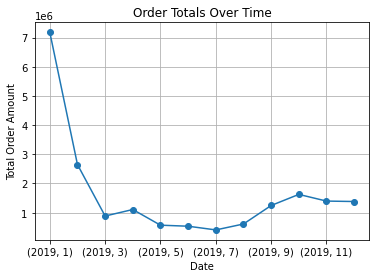

In [25]:
order_totals_over_time = dirty_data.groupby(['year', 'month'])['order_total'].sum()

# Plot order totals over time
order_totals_over_time.plot(kind='line', marker='o')
plt.title('Order Totals Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order Amount')
plt.grid(True)
plt.show()

In [26]:
# Analyze order totals by season
order_totals_by_season = dirty_data.groupby('season')['order_total'].sum()

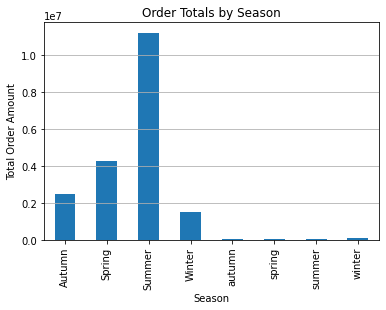

In [27]:
# Plot order totals by season
order_totals_by_season.plot(kind='bar')
plt.title('Order Totals by Season')
plt.xlabel('Season')
plt.ylabel('Total Order Amount')
plt.grid(axis='y')
plt.show()

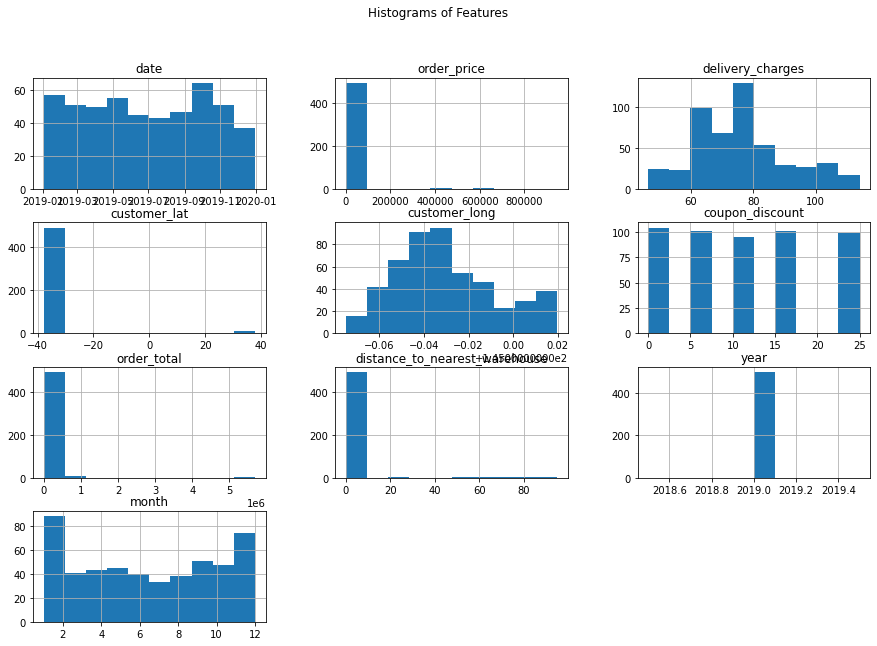

In [28]:
dirty_data.hist(figsize=(15, 10))
plt.suptitle("Histograms of Features")
plt.show()

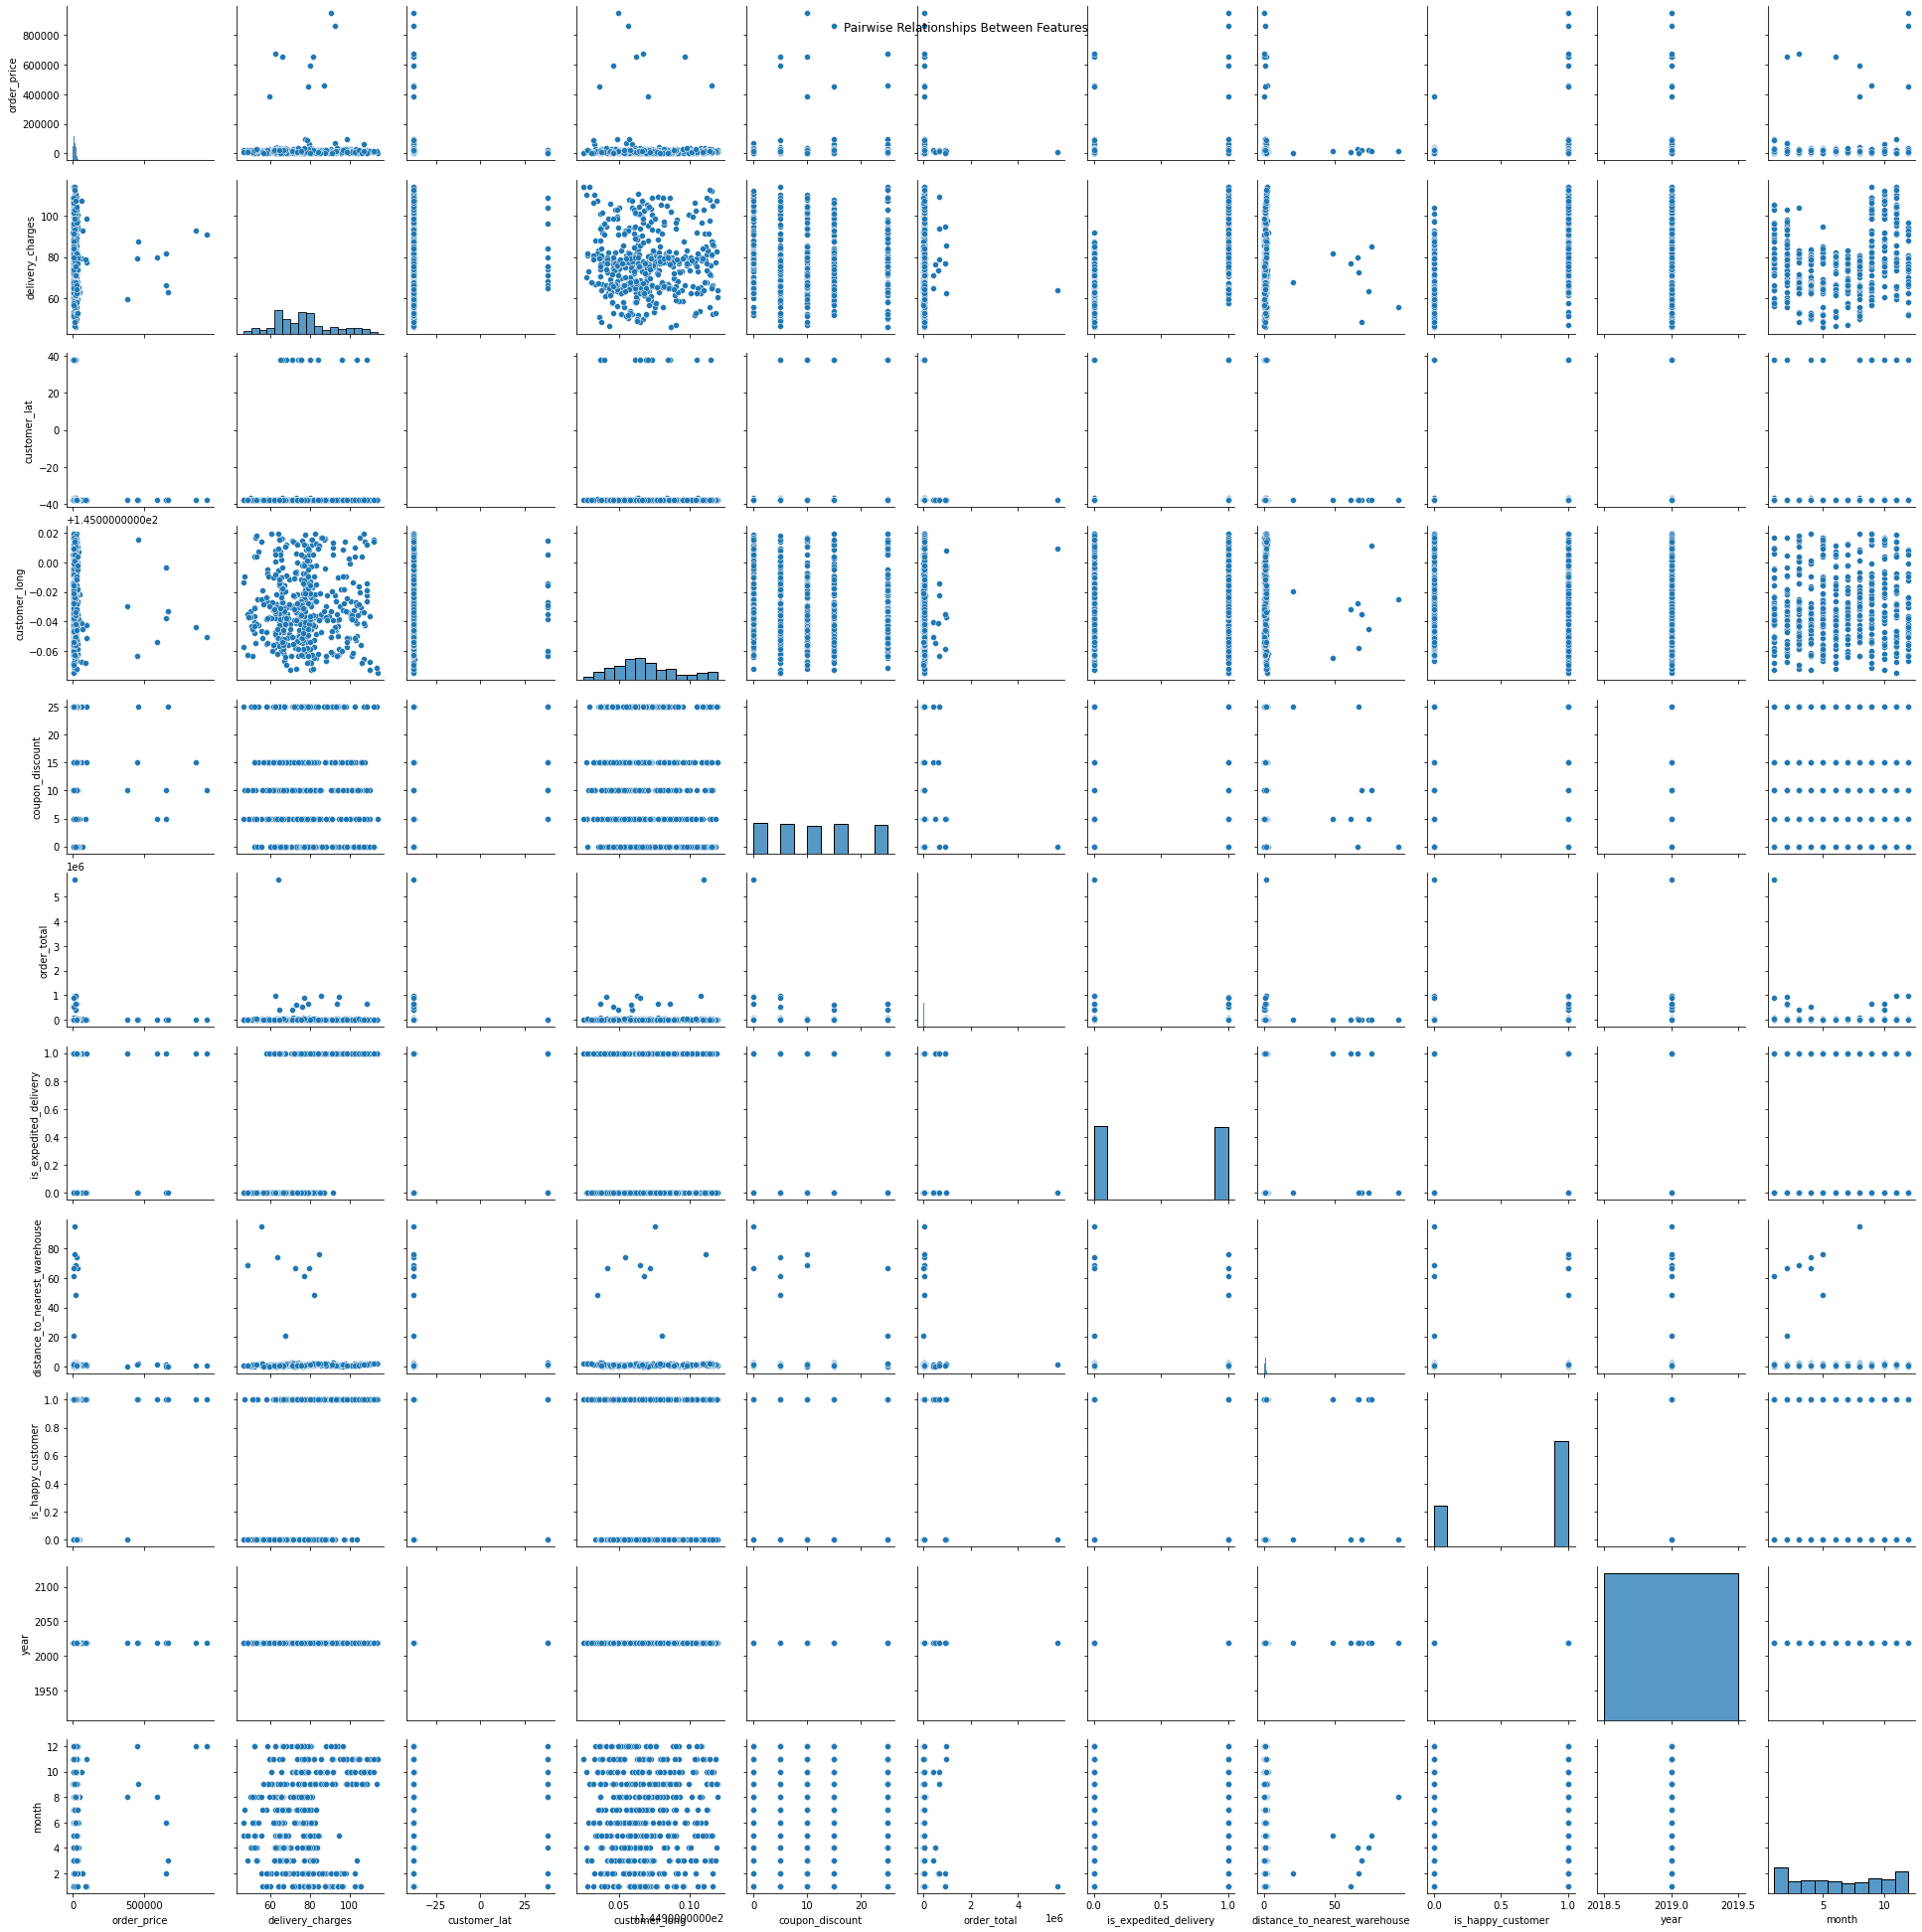

In [29]:
import seaborn as sns
sns.pairplot(dirty_data)
plt.suptitle("Pairwise Relationships Between Features")
plt.show()

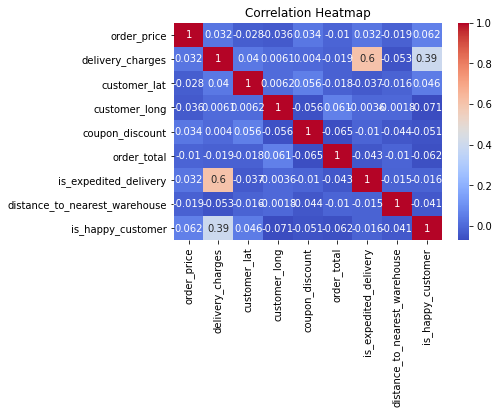

In [30]:
correlation_matrix = df.corr()

# Visualize correlations using heatmaps
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

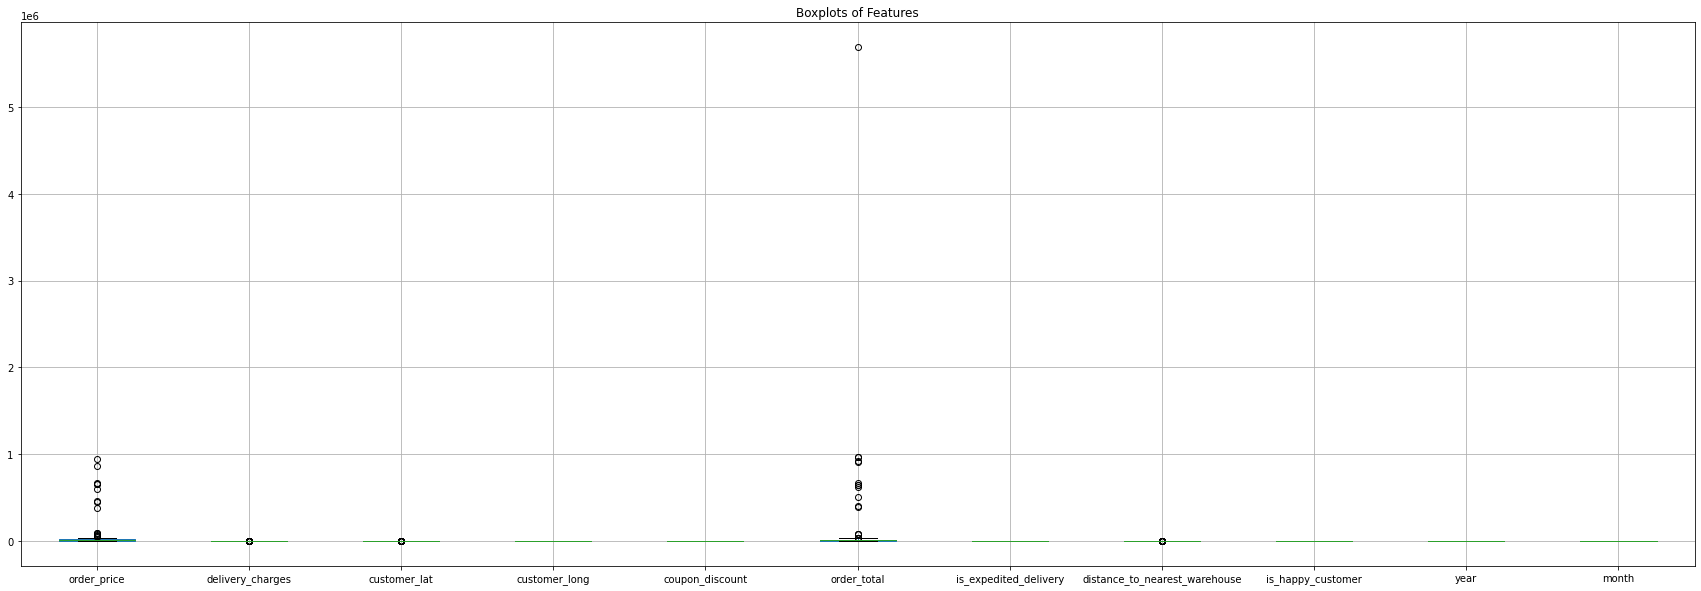

In [31]:
# Plot box plots
dirty_data.boxplot(figsize=(30, 10))
plt.title("Boxplots of Features")
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Example: Predict order_total using order_price and delivery_charges
X = dirty_data[['order_price', 'delivery_charges']]
y = dirty_data['order_total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mean Squared Error: 15483648880.150627


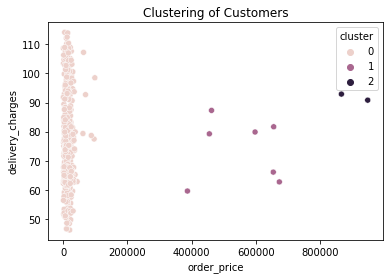

In [33]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


# Step 6: Clustering
# Apply clustering algorithms (example: K-means)
from sklearn.cluster import KMeans

# Example: Cluster customers based on their order totals
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
dirty_data['cluster'] = kmeans.labels_

# Evaluate clustering results (visualization)
sns.scatterplot(data=dirty_data, x='order_price', y='delivery_charges', hue='cluster')
plt.title("Clustering of Customers")
plt.show()


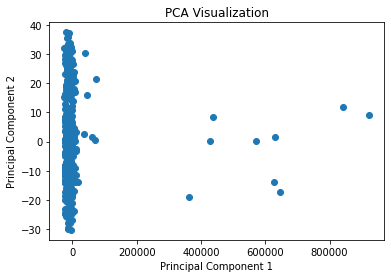

Cluster Statistics:
            order_price  delivery_charges
cluster                                 
0         14388.590631         76.636415
1        554671.857143         73.842857
2        906803.500000         91.860000


In [34]:
from sklearn.decomposition import PCA

# Example: Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize reduced dimensions
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Step 8: Pattern Interpretation
# Interpret patterns and insights
# Draw conclusions and make recommendations
# Example: Analyze cluster characteristics
cluster_stats = dirty_data.groupby('cluster')[['order_price', 'delivery_charges']].mean()
print("Cluster Statistics:\n", cluster_stats)


# **LINEAR REGRESSION**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Example: Predict order_total using order_price and delivery_charges for cleaned data
X_cleaned = cleaned_data[['order_price', 'delivery_charges']]
y_cleaned = cleaned_data['order_total']

# Split the data into training and testing sets
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Create a pipeline with PolynomialFeatures and LinearRegression
pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Train the model
pipeline.fit(X_train_cleaned, y_train_cleaned)

# Evaluate model performance
y_pred_cleaned = pipeline.predict(X_test_cleaned)
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print("Mean Squared Error (Cleaned Data):", mse_cleaned)
print("R-squared score (Cleaned Data):", r2_cleaned)


Mean Squared Error (Cleaned Data): 52561731.51204786
R-squared score (Cleaned Data): 0.05360183703314381


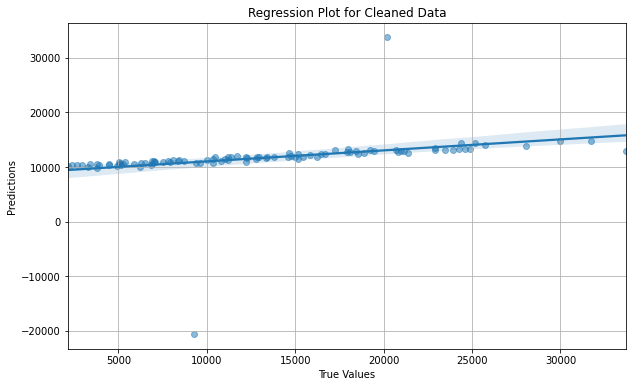

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test_cleaned, y=y_pred_cleaned, scatter_kws={'alpha':0.5})
plt.title('Regression Plot for Cleaned Data')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()


# **BBN IMPLEMENTATION**

1 clusters found
2 clusters found
3 clusters found
4 clusters found
5 clusters found
6 clusters found
7 clusters found
8 clusters found
9 clusters found
10 clusters found
11 clusters found
12 clusters found
13 clusters found
14 clusters found
15 clusters found
16 clusters found
17 clusters found
18 clusters found
19 clusters found
20 clusters found
21 clusters found
22 clusters found
23 clusters found
24 clusters found
25 clusters found
26 clusters found
27 clusters found
28 clusters found
29 clusters found
30 clusters found
31 clusters found
32 clusters found
33 clusters found
34 clusters found
35 clusters found
36 clusters found
37 clusters found
38 clusters found
39 clusters found
40 clusters found
41 clusters found
42 clusters found
43 clusters found
44 clusters found
45 clusters found
46 clusters found
47 clusters found
48 clusters found
49 clusters found
50 clusters found
51 clusters found
52 clusters found
53 clusters found
54 clusters found
55 clusters found
56 clusters found
5

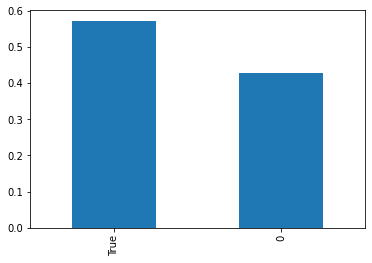

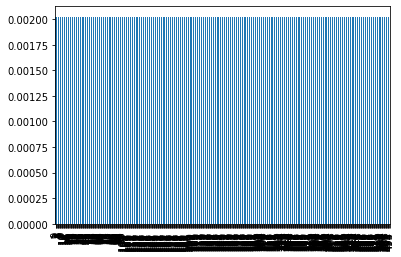

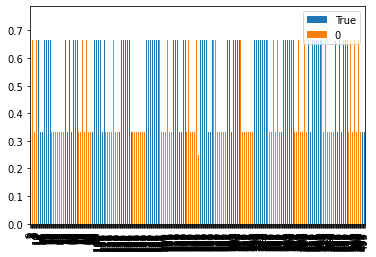

In [46]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

class RetailClassifier(object):
    """Infers a hidden variable and uses Bayesian classification to predict customer satisfaction"""

    def __init__(self, filename):
        data = pd.read_csv(filename)
        clusters = []
        for _, row in data.iterrows():
            best = -1
            sim = 0.5
            for j, cluster in enumerate(clusters):
                x = sum(cluster[key][value] / sum(cluster[key].values())
                        for key, value in row.items()) / len(data.columns)
                if x > sim:
                    best = j
                    sim = x
            if best == -1:
                clusters.append(collections.defaultdict(lambda: collections.defaultdict(float)))
                print(len(clusters), 'clusters found')
            for key, value in row.items():
                clusters[best][key][value] += 1.0
        index = []
        for column in data.columns:
            index.extend([(column, value) for value in data[column].unique()])
        self.probabilities = pd.DataFrame({(key, value): [cluster[key][value] + 1.0 for cluster in clusters]
                                           for key, value in index}).T
        self.prior = self.probabilities.sum(axis=0)
        self.prior /= self.prior.sum()
        self.satisfaction_prior = self.probabilities.loc['is_happy_customer'].sum(axis=1)
        self.satisfaction_prior /= self.satisfaction_prior.sum()
        
        def normalize(group):
            return group.div(group.sum(axis=0), axis='columns')
        
        self.probabilities = self.probabilities.groupby(axis=0, level=0).apply(normalize)

    def __call__(self, **kwargs):
        """Estimates the probability that a customer is satisfied given the features in kwargs"""
        category = self.prior.copy()
        for key, value in kwargs.items():
            category *= self.probabilities.loc[(key, value)]
            category /= category.sum()
        result = self.satisfaction_prior * ((self.probabilities.loc['is_happy_customer'] * category).sum(axis=1))
        return result / result.sum()

    def test(self, filename):
        """Produces KDE plots of the estimated probability"""
        data = pd.read_csv(filename)
        observables = [column for column in data.columns if column != 'is_happy_customer']
        results = pd.DataFrame([self(**row) for _, row in data[observables].iterrows()])
        results['is_happy_customer'] = data['is_happy_customer']
        return results

# Assuming dirty_data is your DataFrame object
# Save your DataFrame to a CSV file
dirty_data.to_csv('dirty_data.csv', index=False)

# Instantiate the RetailClassifier class with the file path
RC = RetailClassifier("dirty_data.csv")

RC.satisfaction_prior.plot.bar()
plt.show()
RC.prior.plot.bar()
plt.show()
RC.probabilities.loc['is_happy_customer'].T.plot.bar()
plt.show()


# **OUTLIER DETECTION**

In [47]:
dirty_data.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer,year,month,cluster
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True,2019,6,0
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False,2019,12,0
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True,2019,3,0
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False,2019,1,0
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True,2019,11,0


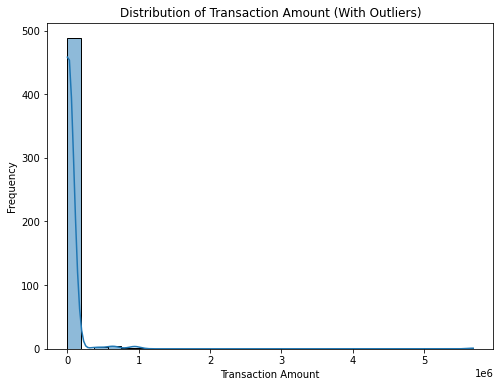

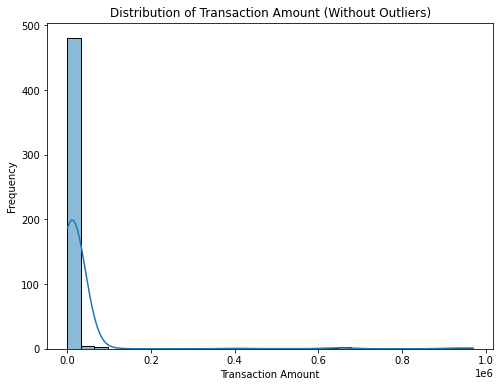

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to detect outliers using Z-score
def detect_outliers_zscore(data, threshold=4):
    # Compute Z-score for the column
    z_scores = (data - data.mean()) / data.std()
    # Find outliers
    outliers = np.abs(z_scores) > threshold
    return outliers

# Detect outliers in the "order_total" column
outliers = detect_outliers_zscore(dirty_data["order_total"])

# Plot the distribution of order totals before removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(dirty_data["order_total"], bins=30, kde=True)
plt.title("Distribution of Transaction Amount (With Outliers)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Remove outliers from the dataframe
clean_data = dirty_data[~outliers]

# Plot the distribution of order totals after removing outliers
plt.figure(figsize=(8, 6))
sns.histplot(clean_data["order_total"], bins=30, kde=True)
plt.title("Distribution of Transaction Amount (Without Outliers)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()
